## Task-D: Collinear features and their effect on linear models

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAIC_Assignments/solving/8_Behavior_of_Linear_Models/task_d.csv')

In [ ]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [ ]:
data.shape

(100, 8)

In [ ]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [ ]:
data

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>



1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [ ]:
#1. Finding the Correlation between the features
# a. check the correlation between the features
data.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


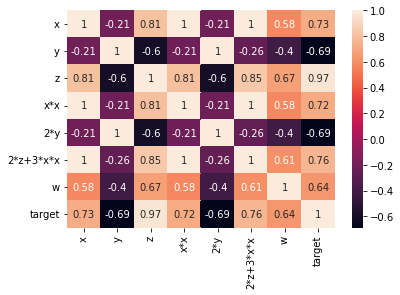

In [ ]:
# b. plot heat map of correlation matrix using seaborn heatmap
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
# 2. Finding the best model for the given data
# a. Train Logistic regression on data(X,Y) that we have created in the above cell
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
alpha = np.logspace(0, 4, 10)
print('values of alpha:', alpha)
# Create hyperparameter options
hyperparameters = dict(alpha=alpha, penalty=penalty)


values of alpha: [1.00000000e+00 2.78255940e+00 7.74263683e+00 2.15443469e+01
 5.99484250e+01 1.66810054e+02 4.64158883e+02 1.29154967e+03
 3.59381366e+03 1.00000000e+04]


In [ ]:
estimator_log = SGDClassifier(loss = 'log')
clf = GridSearchCV(estimator_log, hyperparameters, cv = 5, verbose = 0)
model = clf.fit(X,Y)



In [ ]:
#b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)
best_alpha = model.best_estimator_.get_params()['alpha']
best_penalty = model.best_estimator_.get_params()['penalty']
best_alpha,best_penalty

(1.0, 'l2')

In [ ]:
#c. Creat a new Logistic regression with the best alpha (search for how to get the best hyper parameter value), name the best model as 'best_model'
best_model_log = SGDClassifier(loss = 'log', alpha = best_alpha, penalty = best_penalty)
best_model_log.fit(X,Y)


In [ ]:
# 3. Getting the weights with the original data
# c. Get the weights W using best_model.coef_
best_model_log_coeff = best_model_log.coef_
print('Weights of new mode: ',best_model_log_coeff )

Weights of new mode:  [[ 0.16900286 -0.18779348  0.26012518  0.16481895 -0.18779348  0.1797363
   0.15073136]]


In [ ]:
# b. Check the accuracy of the model 'best_model_accuracy'
from sklearn import model_selection
acc_score = 'accuracy'
kfold_model = model_selection.KFold(n_splits = 10, random_state=7, shuffle = True)
results = model_selection.cross_val_score(best_model_log, X,Y, cv = kfold_model, scoring = acc_score)
print("Accuracy of the model: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy of the model: 1.000 (0.000)


In [ ]:
#step-4 Modifying original data
X_new = X
Y_new = Y


In [ ]:
# adding 10^-2 to all elements of X
row = len(X_new)
col = len(X_new[0])
for r in range(row): 
    for c in range(col): 
        X_new[r][c] = X_new[r][c] + (1/100)


In [ ]:
# Train the same 'best_model' with data (X', Y)
best_model_log.fit(X_new, Y)


SGDClassifier(alpha=1.0, loss='log')

In [ ]:
# Check the accuracy of the model 'best_model_accuracy_edited'
from sklearn import model_selection
acc_score = 'accuracy'
kfold_model = model_selection.KFold(n_splits = 10, random_state=7, shuffle = True)
results_edited = model_selection.cross_val_score(best_model_log, X_new,Y, cv = kfold_model, scoring = acc_score)
print("Accuracy of the model with denoised data: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy of the model with denoised data: 1.000 (0.000)


In [ ]:
best_model_coef_edited = best_model_log.coef_

In [ ]:
#find the absolute change between each value of W and W' ==> |(W-W')|
weight_diff_feature = abs(best_model_coef_edited -  best_model_log_coeff)
weight_diff_feature

array([[2.77287579e-04, 2.60887934e-04, 3.08959849e-04, 2.81790050e-04,
        2.60887934e-04, 2.83156422e-04, 6.70390019e-05]])

In [ ]:
# find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
results - results_edited

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# print the top 4 features which have higher % change in weights compare to theother feature
weight_diff_feature
sorted_index_weight_diff_feature = np.argsort(weight_diff_feature)

In [ ]:
count = 0
print('print the top 4 features which have higher % change in weights compare to the other feature: ')
# for i in sorted_index_weight_diff_feature[0]:
#     count+=1
#     print(data.columns[i])
#     if count ==4:
#         break
for i in sorted_index_weight_diff_feature[0][:4]:
    print(data.columns[i])  

print the top 4 features which have higher % change in weights compare to the other feature: 
w
y
2*y
x


# **Task-2**


In [ ]:
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
alpha = np.logspace(0, 4, 10)
# Create hyperparameter options
hyperparameters = dict(alpha=alpha, penalty=penalty)
estimator_svm = SGDClassifier(loss='hinge')
clf_lr_svm = GridSearchCV(estimator_svm, hyperparameters, cv=5, verbose=0)
model_lr_svm = clf_lr_svm.fit(X,Y)
best_alpha_lr_svm = model.best_estimator_.get_params()['alpha']
best_penalty_lr_svm = model.best_estimator_.get_params()['penalty']
best_alpha_lr_svm, best_penalty_lr_svm

(1.0, 'l2')

In [ ]:

best_model_lr_svm = SGDClassifier(loss='hinge', alpha=best_alpha_lr_svm, penalty=best_penalty_lr_svm)
best_model_lr_svm.fit(X, Y)


SGDClassifier(alpha=1.0)

In [ ]:
best_model_lr_svm_coeff = best_model_lr_svm.coef_
best_model_lr_svm_coeff


array([[ 0.16317092, -0.22350926,  0.35693343,  0.15365796, -0.22350926,
         0.18140221,  0.13355616]])

In [ ]:
from sklearn import model_selection
acc_score_lr_svm = 'accuracy'
kfold_model_lr_svm = model_selection.KFold(n_splits = 10, random_state=7, shuffle = True)
results_svm = model_selection.cross_val_score(best_model_lr_svm, X,Y, cv = kfold_model_lr_svm, scoring = acc_score_lr_svm)
print("Accuracy of the model: %.3f (%.3f)" % (results_svm.mean(), results_svm.std()))

Accuracy of the model: 1.000 (0.000)


In [ ]:
#step-4 Modifying original data
X_new = X
Y_new = Y

In [ ]:
# adding 10^-2 to all elements of X
row = len(X_new)
col = len(X_new[0])
for r in range(row): 
    for c in range(col): 
        X_new[r][c] = X_new[r][c] + (1/100)

In [ ]:
# Train the same 'best_model' with data (X', Y)
best_model_lr_svm.fit(X_new, Y)

SGDClassifier(alpha=1.0)

In [ ]:
# Check the accuracy of the model 'best_model_accuracy_edited'
from sklearn import model_selection
acc_score_lr_svm = 'accuracy'
kfold_model_lr_svm = model_selection.KFold(n_splits = 10, random_state=7, shuffle = True)
results_svm_edited = model_selection.cross_val_score(best_model_lr_svm, X_new,Y, cv = kfold_model_lr_svm, scoring = acc_score_lr_svm)
print("Accuracy of the model: %.3f (%.3f)" % (results_svm_edited.mean(), results_svm_edited.std()))

Accuracy of the model: 1.000 (0.000)


In [ ]:
best_model_lr_svm_coeff_edited = best_model_lr_svm.coef_
best_model_lr_svm_coeff_edited

array([[ 0.16110677, -0.22373947,  0.35624348,  0.15132989, -0.22373947,
         0.17922183,  0.1350263 ]])

In [ ]:
#find the absolute change between each value of W and W' ==> |(W-W')|
weight_diff_feature_svm = abs(best_model_lr_svm_coeff_edited -  best_model_lr_svm_coeff)
weight_diff_feature_svm

array([[0.00206416, 0.00023021, 0.00068995, 0.00232807, 0.00023021,
        0.00218038, 0.00147014]])

In [ ]:
## find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
results_svm_edited - results_svm

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# print the top 4 features which have higher % change in weights compare to theother feature
weight_diff_feature_svm
sorted_index_weight_diff_feature_svm = np.argsort(weight_diff_feature_svm)

In [ ]:
count = 0
print('print the top 4 features which have higher % change in weights compare to the other feature: ')
for i in sorted_index_weight_diff_feature_svm[0][:4]:
    print(data.columns[i]) 

print the top 4 features which have higher % change in weights compare to the other feature: 
y
2*y
z
w


# Observation:

- Accuracy is the same before and after adding noise to data.

- In comparison to other features, weight is one of the top 4 features that has changed by a bigger percentage.